In [4]:
import ee

In [6]:
ee.Initialize()

In [11]:
import folium

In [31]:
dataset = ee.ImageCollection("LANDSAT/LO08/C01/T1_RT")

visualization = {"bands['B4', 'B3', 'B2']", "min : 0.0", "max:30000.0"}

mymap = folium.Map(
    location=[41, -84.108],
    zoom_start=8,
    tiles='OpenStreetMap')
mymap



In [34]:
def addDate(image):
    # parse date stored in 'system:index'
    date = ee.Date(image.get('system:index'))

    # format date, see http:#www.joda.org/joda-time/apidocs/org/joda/time/format/DateTimeFormat.html
    str = date.format('YYYY-mm-dd')

    return image.set({'Date': str})


point = ee.Geometry.Point(-122.262, 37.8719)
start = ee.Date('2014-06-01')
finish = ee.Date('2014-10-01')

filteredCollection = ee.ImageCollection('LANDSAT/LC08/C01/T1').filterBounds(point).filterDate(start, finish).sort('CLOUD_COVER', True) 

In [42]:
IC = filteredCollection
nIC = IC.size().getInfo()
print(nIC)

8


cuenta numero de imagenes cortadas

In [43]:
cuenteIds = IC.reduceColumns(ee.Reducer.toList(), ['system:index']).get('list')
print(cuenteIds.getInfo())

['LC08_044034_20140724', 'LC08_044034_20140926', 'LC08_044034_20140910', 'LC08_044034_20140622', 'LC08_044034_20140606', 'LC08_044034_20140708', 'LC08_044034_20140809', 'LC08_044034_20140825']


muestra el listado de imagenes

In [59]:
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np 
import rasterio as rio
from matplotlib import pyplot

'/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta'

In [63]:
cd NDVIcalculationLandsat8imageswithPythonandRasterio

/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta/NDVIcalculationLandsat8imageswithPythonandRasterio


In [65]:
cd landsat8

/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta/NDVIcalculationLandsat8imageswithPythonandRasterio/Landsat8


In [66]:
import os
os.listdir('../Landsat8/')

['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [54]:
tif_file = ee.Image('/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta/NDVIcalculationLandsat8imageswithPythonandRasterio/landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif')

In [67]:
imagePath = '../Landsat8/'
band4 = rasterio.open(imagePath+'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.TIF') #red
band5 = rasterio.open(imagePath+'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.TIF') #nir

In [69]:
band4.count

1

In [70]:
band4.width

2107

In [71]:
band4.height

1338

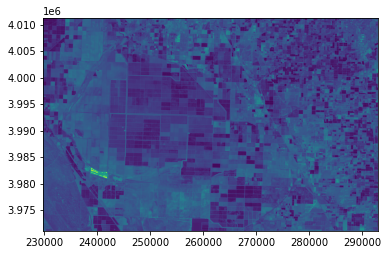

<AxesSubplot:>

In [72]:
plot.show(band4)

In [73]:
band4.dtypes[0]

'uint16'

In [74]:
band4.crs

CRS.from_epsg(32611)

In [75]:
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [76]:
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

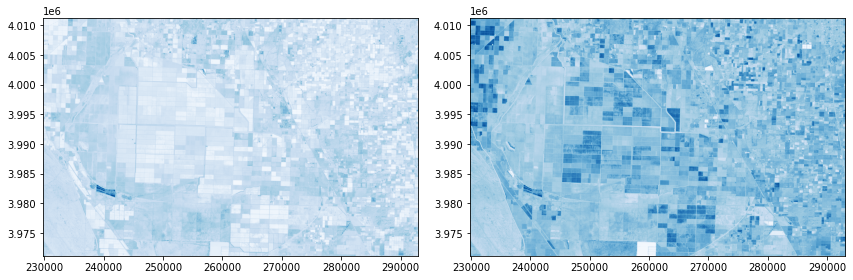

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues')
plot.show(band5, ax=ax2, cmap='Blues')
fig.tight_layout()

In [78]:
nir = band5.read(1).astype('float64')
red = band4.read(1).astype('float64')

nir[4000:4005,4000:4005]

array([], shape=(0, 0), dtype=float64)

In [79]:
#ndvi calculation, empty cells or nodata cells are reporte as 0
ndvi = np.where(
                (nir+red)==0.,
                0,
                (nir-red)/(nir+red)
               )

In [90]:
ls

Landsat8/ Output/   Scripts/


In [93]:
cd output

/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta/NDVIcalculationLandsat8imageswithPythonandRasterio/Output


In [94]:
os.listdir('../Output/')

[]

In [95]:
ndviImage = rasterio.open('../Output/ndviImage.tiff', 'w', driver='Gtiff',
                          width=band4.width, height=band4.height,
                          count=1,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype='float64'                  
                         )
ndviImage.write(ndvi,1) #ndvi
ndviImage.close()

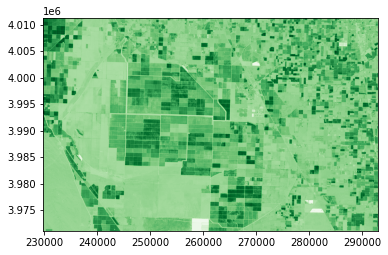

<AxesSubplot:>

In [99]:
ndvi = rasterio.open('../Output/ndviImage.tiff')
plot.show(ndvi, cmap='Greens')

In [97]:
ndvi = rasterio.open('../Output/ndviImage_clip.tiff')

RasterioIOError: ../Output/ndviImage_clip.tiff: No such file or directory

In [80]:

plot.show(ndvi, cmap='Greens')

RasterioIOError: ../Output/ndviImage_clip.tiff: No such file or directory

In [68]:
src = rio.open(band4)

IndexError: band index 1024 out of range (not in (1,))

Exception ignored in: 'rasterio._filepath.filepath_read'
Traceback (most recent call last):
  File "rasterio/_io.pyx", line 492, in rasterio._io.DatasetReaderBase.read
IndexError: band index 1024 out of range (not in (1,))


AttributeError: 'DatasetReader' object has no attribute 'seek'

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "rasterio/_filepath.pyx", line 141, in rasterio._filepath.filepath_seek
AttributeError: 'DatasetReader' object has no attribute 'seek'


RasterioIOError: '/vsipythonfilelike/53f6a07c-790f-4ed6-a2a5-0ddbc6b9f726/53f6a07c-790f-4ed6-a2a5-0ddbc6b9f726' not recognized as a supported file format.

In [51]:



pyplot.imshow(src.read(1), cmap='pink')
pyplot.show = lambda : None  # prevents showing during doctests
pyplot.show()

TypeError: invalid path or file: <ee.image.Image object at 0x28f4f95e0>

In [49]:
pwd()

'/Users/gabrielalvarez/Dropbox/pendrives/Tercera_region/Imagen_landsat_afta'

In [ ]:

ICFilter= IC.filterDate('2019-07-01','2019-08-01')

GPLCH=ee.Geometry.Point(-76.10, -11.005)

ICFilter=ICFilter.filterBounds(GPLCH)

nICFilter=ICFilter.size().getInfo()

if nICFilter==0:print("no hay imagenes")
else:
    print("cantidad "+str(nICFilter))
    cuenteIds = ICFilter.reduceColumns(ee.Reducer.toList(), ['system:index'])
    cuenteIds = cuenteIds.get('list')
    print(cuenteIds.getInfo())

In [36]:
import rasterio
from matplotlib import pyplot

In [41]:
save.filteredCollection('gaaa4.html')

NameError: name 'save' is not defined

In [40]:
filteredCollection

# pruebas landsat images

In [39]:
save.filteredCollection('gaaa4.html')

NameError: name 'save' is not defined